Tensor flow development

In [35]:
# mlp for binary classification
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
import tensorflow as tf

In [36]:
# Download dataset
TITANIC_TRAIN = "/data/train.csv"

names = ["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]
data = pd.read_csv(TITANIC_TRAIN, names=names, skiprows=1)

# Train and test input data
data = data.drop(["Name","PassengerId","Cabin","Ticket"], axis=1)
data['Sex'] = pd.factorize(data.Sex)[0]
data['Embarked'] = pd.factorize(data.Embarked)[0]

# We have NaN values in Age. We substitute them by the average
data["Age"] = data.Age.fillna(data.Age.mean())

X = data.drop("Survived", axis=1)

y = data["Survived"]

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [37]:
print(X)
print(y)

     Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0       1.0  0.0  0.271174  0.125  0.000000  0.014151  0.333333
1       0.0  1.0  0.472229  0.125  0.000000  0.139136  0.666667
2       1.0  1.0  0.321438  0.000  0.000000  0.015469  0.333333
3       0.0  1.0  0.434531  0.125  0.000000  0.103644  0.333333
4       1.0  0.0  0.434531  0.000  0.000000  0.015713  0.333333
..      ...  ...       ...    ...       ...       ...       ...
886     0.5  0.0  0.334004  0.000  0.000000  0.025374  0.333333
887     0.0  1.0  0.233476  0.000  0.000000  0.058556  0.333333
888     1.0  1.0  0.367921  0.125  0.333333  0.045771  0.333333
889     0.0  0.0  0.321438  0.000  0.000000  0.058556  0.666667
890     1.0  0.0  0.396833  0.000  0.000000  0.015127  1.000000

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


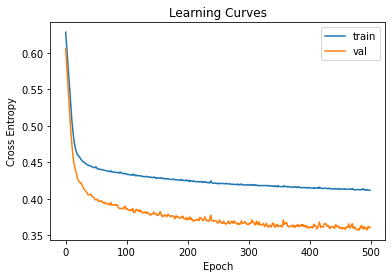

In [39]:
X_train = X
y_train = y

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

#SGD = tf.keras.optimizers.SGD(
#    learning_rate=0.01, momentum=0.9, nesterov=False, name='SGD'
#)

# compile the model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=0, validation_split=0.2)

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
